<a href="https://colab.research.google.com/github/Brayan8Ch/-proyectodg/blob/master/challenge_dg_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Cargar el dataset
url = "https://raw.githubusercontent.com/Brayan8Ch/-proyectodg/refs/heads/master/StudentsPerformance.csv"
df = pd.read_csv(url)

print("Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape}")
df.head()

Dataset cargado exitosamente
Dimensiones: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
print("\n1️⃣ INFORMACIÓN BÁSICA DEL DATASET")
print("-"*40)
print(f"📏 Dimensiones: {df.shape}")
print(f"📋 Variables: {df.columns.tolist()}")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 1.2 Tipos de datos y valores únicos
print("\n📋 TIPOS DE DATOS Y VALORES ÚNICOS:")
for col in df.columns:
    dtype = df[col].dtype
    unique_count = df[col].nunique()
    print(f"• {col}: {dtype} ({unique_count} valores únicos)")


1️⃣ INFORMACIÓN BÁSICA DEL DATASET
----------------------------------------
📏 Dimensiones: (1000, 8)
📋 Variables: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
💾 Memoria utilizada: 303.71 KB

📋 TIPOS DE DATOS Y VALORES ÚNICOS:
• gender: object (2 valores únicos)
• race/ethnicity: object (5 valores únicos)
• parental level of education: object (6 valores únicos)
• lunch: object (2 valores únicos)
• test preparation course: object (2 valores únicos)
• math score: int64 (81 valores únicos)
• reading score: int64 (72 valores únicos)
• writing score: int64 (77 valores únicos)


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


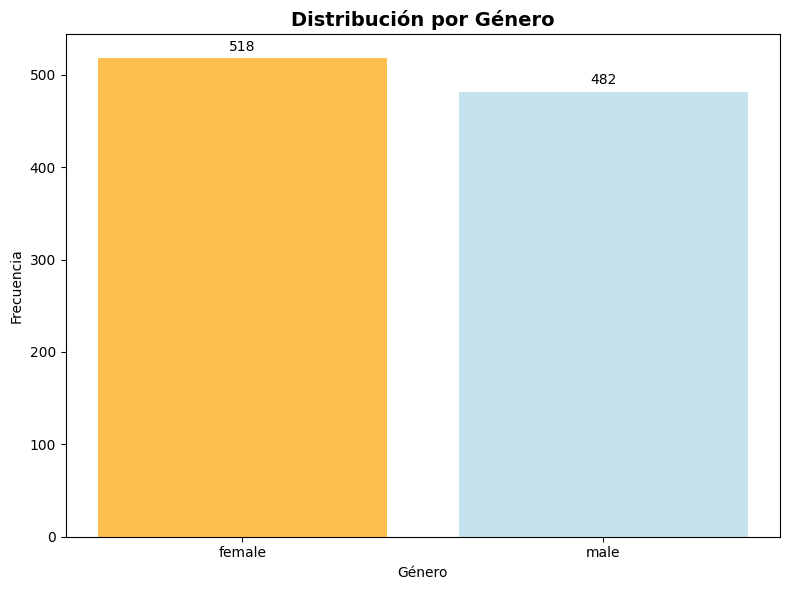

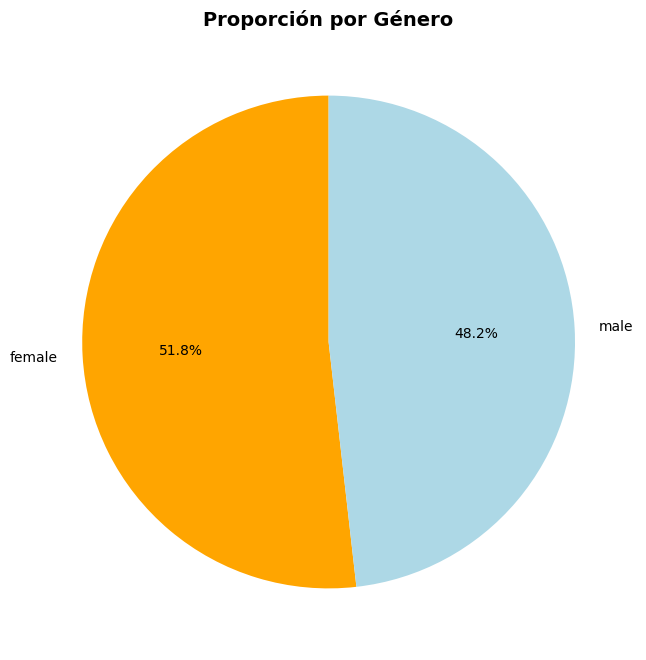

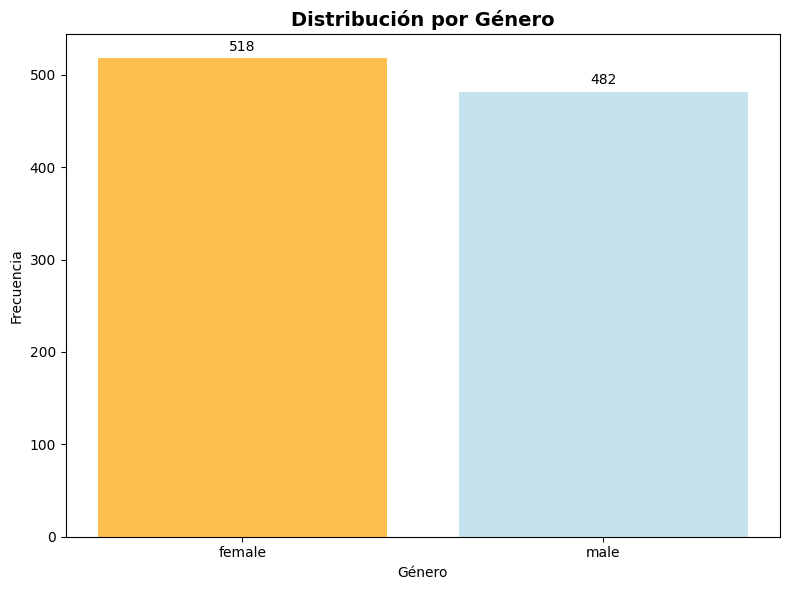

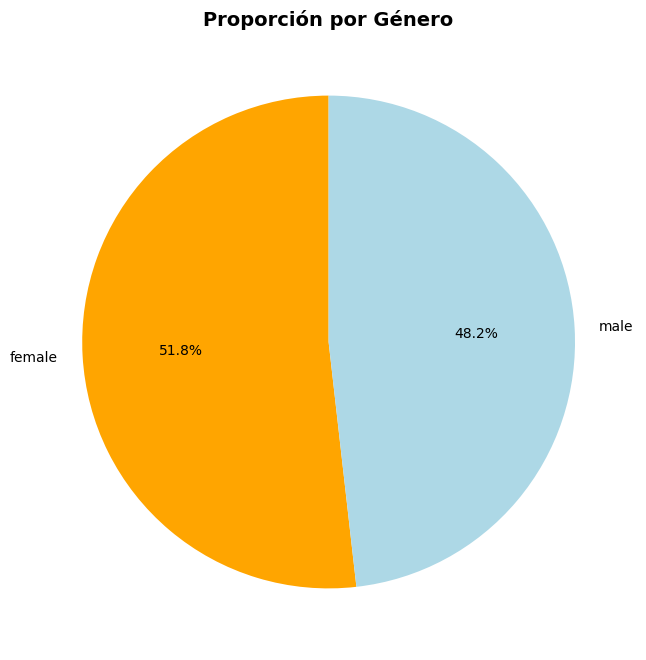

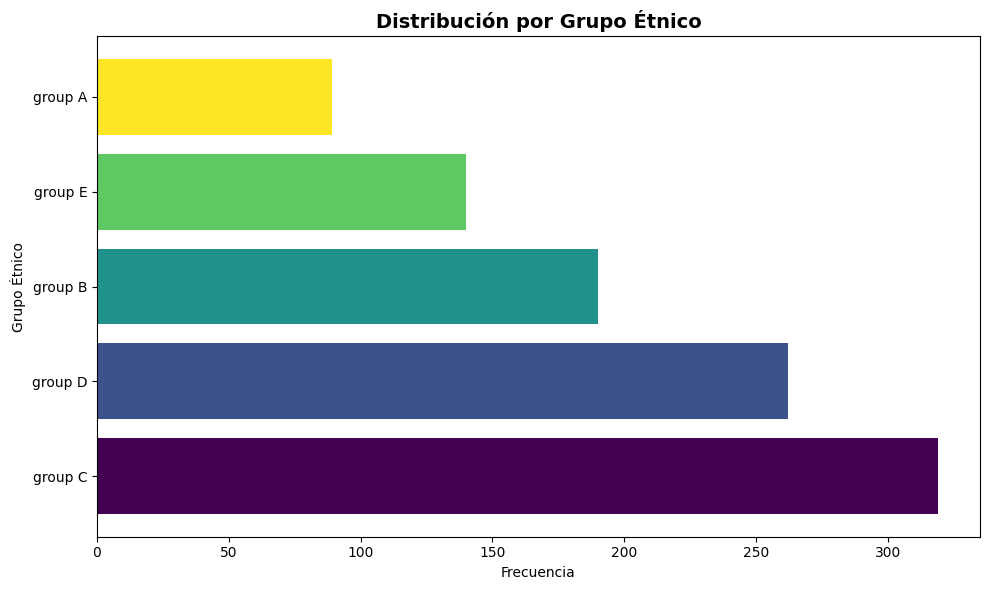

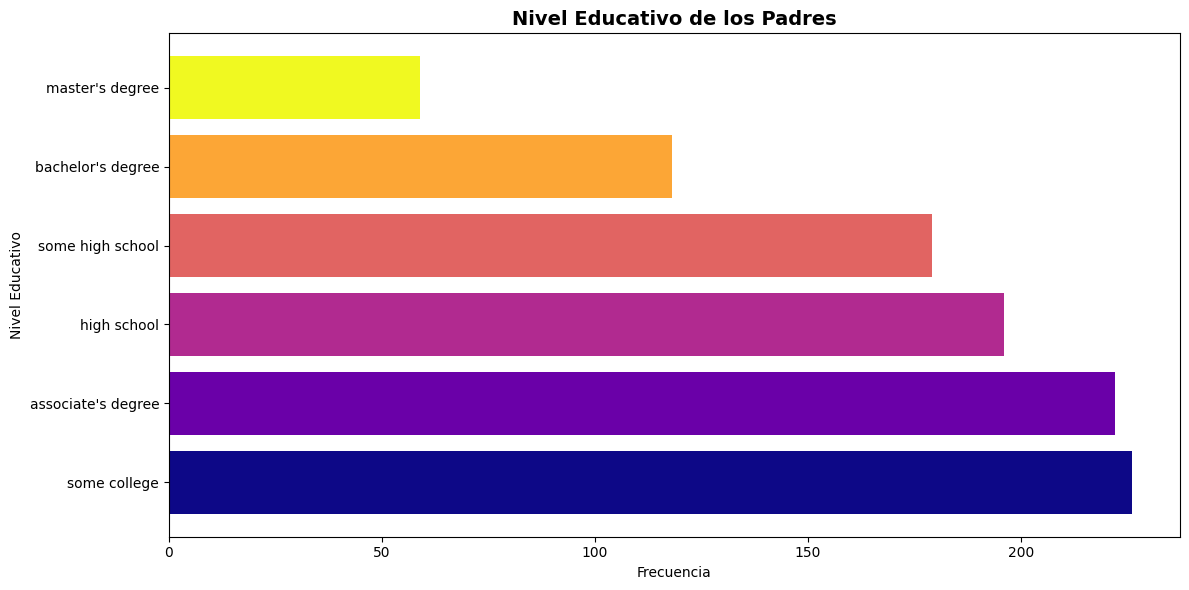

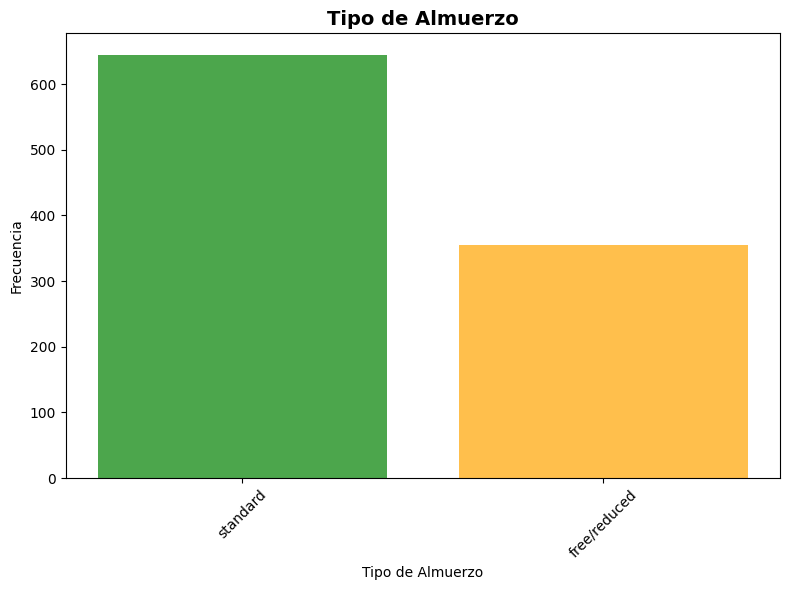

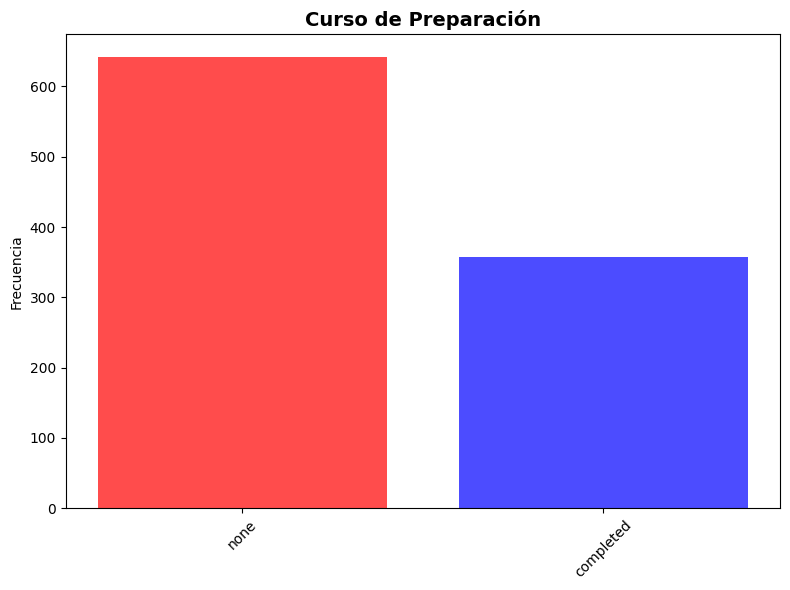

In [38]:
# Crear gráfico para distribución por género
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Gender (2 valores únicos) - Gráfico de barras
gender_counts = df['gender'].value_counts()
bars = ax.bar(gender_counts.index, gender_counts.values, 
              color=['orange', 'lightblue'], alpha=0.7)
ax.set_title('Distribución por Género', fontsize=14, fontweight='bold')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Género')

# Añadir etiquetas con valores
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Crear solo el gráfico pie para gender
plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, 
    autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
plt.title('Proporción por Género', fontsize=14, fontweight='bold')
plt.show()

# Distribución por raza/etnicidad
plt.figure(figsize=(10, 6))
race_counts = df['race/ethnicity'].value_counts()
bars = plt.barh(race_counts.index, race_counts.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(race_counts))))
plt.title('Distribución por Grupo Étnico', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia')
plt.ylabel('Grupo Étnico')
plt.tight_layout()
plt.show()

# Nivel educativo de los padres
plt.figure(figsize=(12, 6))
education_counts = df['parental level of education'].value_counts()
bars = plt.barh(education_counts.index, education_counts.values,
                color=plt.cm.plasma(np.linspace(0, 1, len(education_counts))))
plt.title('Nivel Educativo de los Padres', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()

# Tipo de almuerzo
plt.figure(figsize=(8, 6))
lunch_counts = df['lunch'].value_counts()
bars = plt.bar(lunch_counts.index, lunch_counts.values,
               color=['green', 'orange'], alpha=0.7)
plt.title('Tipo de Almuerzo', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de Almuerzo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Curso de preparación
plt.figure(figsize=(8, 6))
prep_counts = df['test preparation course'].value_counts()
bars = plt.bar(prep_counts.index, prep_counts.values,
               color=['red', 'blue'], alpha=0.7)
plt.title('Curso de Preparación', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 TÉCNICAS ESTADÍSTICAS PARA REVELAR PATRONES

## 🎯 **¿Qué son las técnicas estadísticas en EDA?**

Las técnicas estadísticas nos ayudan a:
- 🔍 **Detectar patrones ocultos** en los datos
- 📈 **Identificar tendencias** y relaciones
- 🎯 **Encontrar outliers** (valores atípicos)
- 📊 **Comparar grupos** de manera objetiva
- 🔗 **Medir correlaciones** entre variables

## 📈 **Técnicas que aplicaremos:**

1. **Análisis de Distribución** → ¿Los datos siguen una distribución normal?
2. **Detección de Outliers** → ¿Hay valores extremos que afecten el análisis?
3. **Análisis de Correlación** → ¿Qué variables están relacionadas?
4. **Pruebas Estadísticas** → ¿Las diferencias entre grupos son significativas?
5. **Análisis de Tendencias** → ¿Qué patrones emergen de los datos?

🔍 ANÁLISIS DE DISTRIBUCIÓN Y NORMALIDAD

📈 ANÁLISIS DE NORMALIDAD (Prueba Shapiro-Wilk):
--------------------------------------------------
• math score:
  - Estadístico: 0.9932
  - p-valor: 0.000145
  - ¿Es normal?: NO (α=0.05)
  - Media: 66.09, Desv.Est: 15.16
• reading score:
  - Estadístico: 0.9929
  - p-valor: 0.000106
  - ¿Es normal?: NO (α=0.05)
  - Media: 69.17, Desv.Est: 14.60
• writing score:
  - Estadístico: 0.9920
  - p-valor: 0.000029
  - ¿Es normal?: NO (α=0.05)
  - Media: 68.05, Desv.Est: 15.20


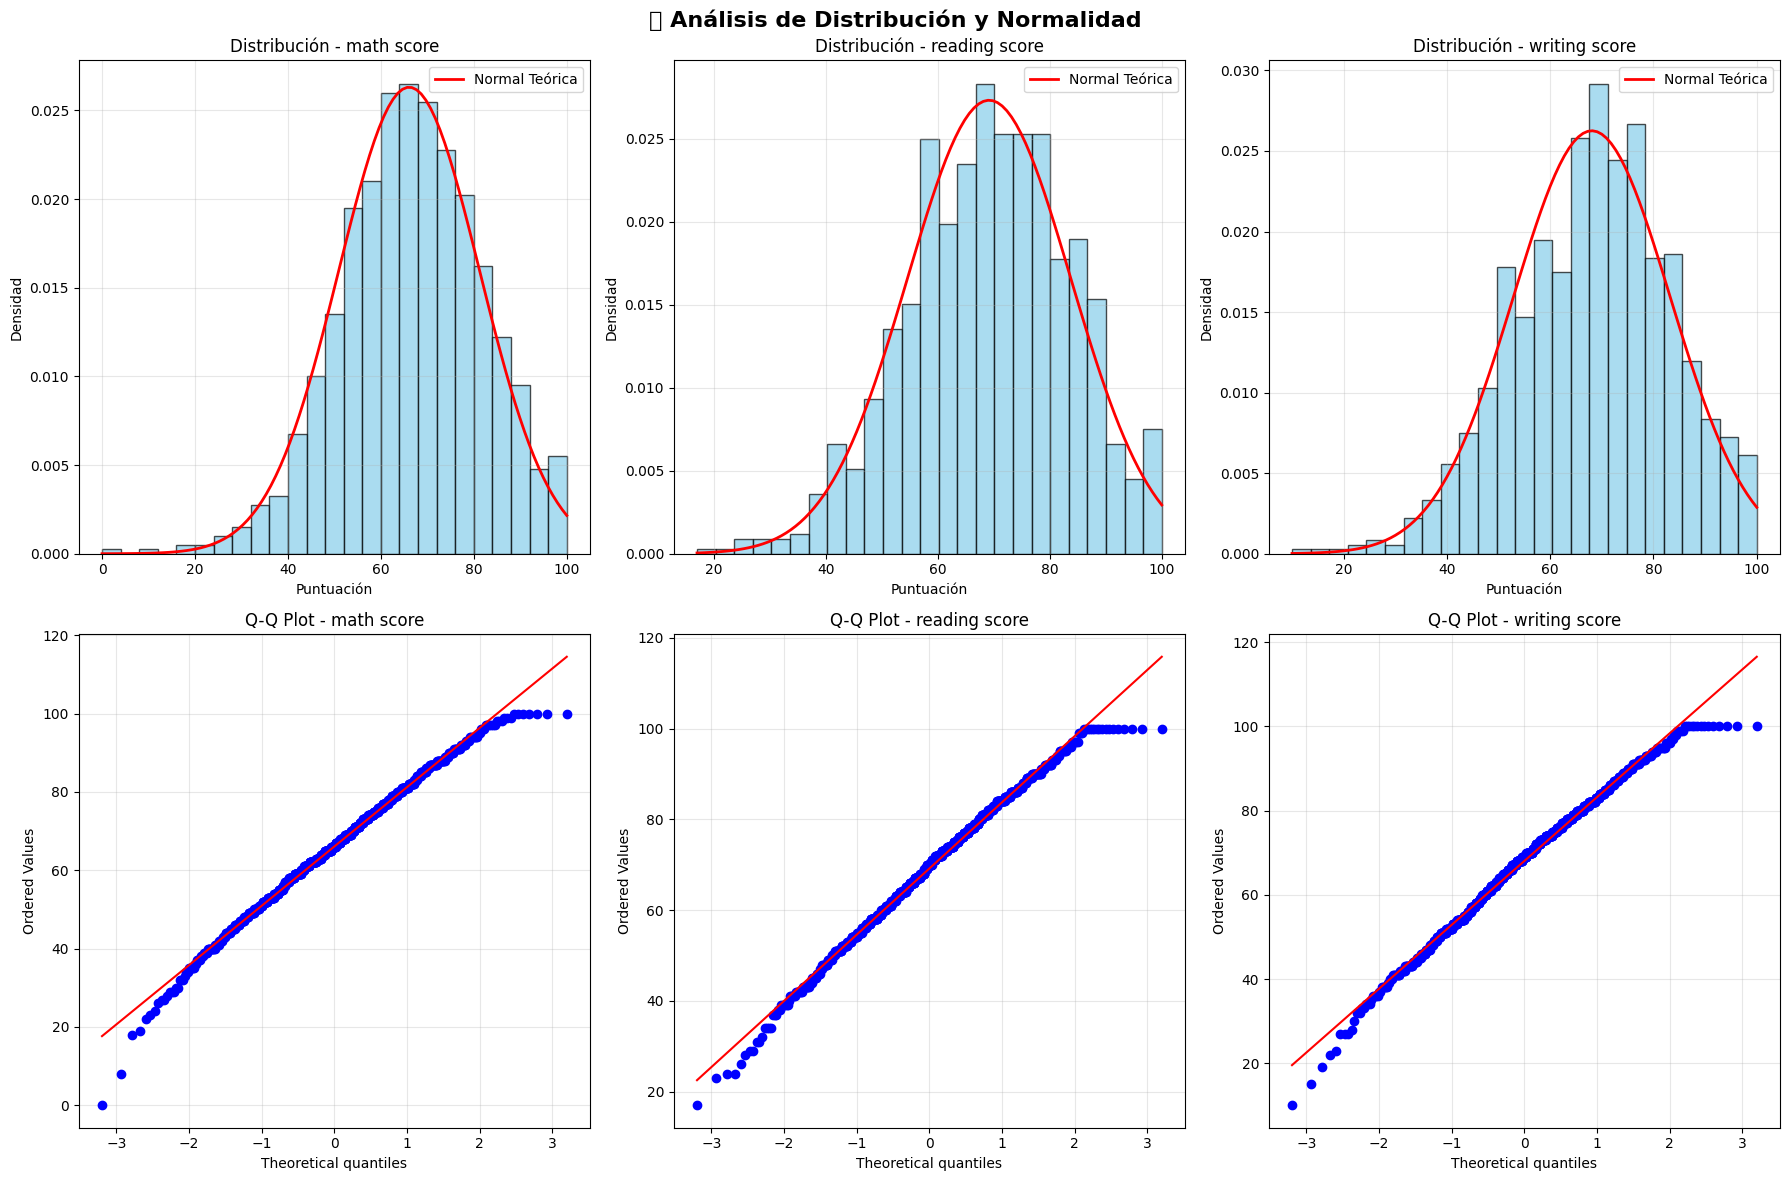


📊 MEDIDAS DE FORMA DE LA DISTRIBUCIÓN:
--------------------------------------------------

• math score:
  - Asimetría: -0.279 → aproximadamente simétrica
  - Curtosis: 0.275 → distribución normal (mesocúrtica)

• reading score:
  - Asimetría: -0.259 → aproximadamente simétrica
  - Curtosis: -0.068 → distribución normal (mesocúrtica)

• writing score:
  - Asimetría: -0.289 → aproximadamente simétrica
  - Curtosis: -0.033 → distribución normal (mesocúrtica)

💡 INTERPRETACIÓN:
• Si p-valor > 0.05: Los datos siguen distribución normal
• Si p-valor ≤ 0.05: Los datos NO siguen distribución normal
• Q-Q Plot: Si los puntos siguen la línea, es distribución normal


In [ ]:
# 📊 TÉCNICA 1: ANÁLISIS DE DISTRIBUCIÓN Y NORMALIDAD
print("🔍 ANÁLISIS DE DISTRIBUCIÓN Y NORMALIDAD")
print("="*60)


warnings.filterwarnings('ignore')

# Variables numéricas
numeric_cols = ['math score', 'reading score', 'writing score']

# Crear gráficos para análisis de distribución
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Análisis de Distribución y Normalidad', fontsize=16, fontweight='bold')

print("\n📈 ANÁLISIS DE NORMALIDAD (Prueba Shapiro-Wilk):")
print("-" * 50)

for i, col in enumerate(numeric_cols):
    # Histograma con curva normal superpuesta
    axes[0, i].hist(df[col], bins=25, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Agregar curva normal teórica
    mu, sigma = df[col].mean(), df[col].std()
    x = np.linspace(df[col].min(), df[col].max(), 100)
    normal_curve = stats.norm.pdf(x, mu, sigma)
    axes[0, i].plot(x, normal_curve, 'r-', linewidth=2, label='Normal Teórica')
    
    axes[0, i].set_title(f'Distribución - {col}')
    axes[0, i].set_xlabel('Puntuación')
    axes[0, i].set_ylabel('Densidad')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Q-Q Plot para normalidad
    stats.probplot(df[col], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'Q-Q Plot - {col}')
    axes[1, i].grid(True, alpha=0.3)
    
    # Prueba de normalidad Shapiro-Wilk
    statistic, p_value = stats.shapiro(df[col])
    is_normal = "SÍ" if p_value > 0.05 else "NO"
    print(f"• {col}:")
    print(f"  - Estadístico: {statistic:.4f}")
    print(f"  - p-valor: {p_value:.6f}")
    print(f"  - ¿Es normal?: {is_normal} (α=0.05)")
    print(f"  - Media: {mu:.2f}, Desv.Est: {sigma:.2f}")

plt.tight_layout()
plt.show()

# Análisis de asimetría y curtosis
print(f"\n📊 MEDIDAS DE FORMA DE LA DISTRIBUCIÓN:")
print("-" * 50)
for col in numeric_cols:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    
    # Interpretación de asimetría
    if abs(skewness) < 0.5:
        skew_interp = "aproximadamente simétrica"
    elif skewness > 0:
        skew_interp = "asimétrica hacia la derecha (cola larga a la derecha)"
    else:
        skew_interp = "asimétrica hacia la izquierda (cola larga a la izquierda)"
    
    # Interpretación de curtosis
    if abs(kurtosis) < 0.5:
        kurt_interp = "distribución normal (mesocúrtica)"
    elif kurtosis > 0:
        kurt_interp = "más puntiaguda que normal (leptocúrtica)"
    else:
        kurt_interp = "más aplanada que normal (platicúrtica)"
    
    print(f"\n• {col}:")
    print(f"  - Asimetría: {skewness:.3f} → {skew_interp}")
    print(f"  - Curtosis: {kurtosis:.3f} → {kurt_interp}")

print(f"\n💡 INTERPRETACIÓN:")
print("• Si p-valor > 0.05: Los datos siguen distribución normal")
print("• Si p-valor ≤ 0.05: Los datos NO siguen distribución normal")
print("• Q-Q Plot: Si los puntos siguen la línea, es distribución normal")

In [ ]:
# 📊 TÉCNICA 2: DETECCIÓN AVANZADA DE OUTLIERS
print("\n🎯 DETECCIÓN AVANZADA DE OUTLIERS")
print("="*60)

# Crear gráficos para detección de outliers
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('🎯 Detección de Outliers - Múltiples Métodos', fontsize=16, fontweight='bold')

print("\n📊 REPORTE DETALLADO DE OUTLIERS:")
print("-" * 50)

# Función para detectar outliers con diferentes métodos
def detectar_outliers_completo(data, columna):
    """Detecta outliers usando múltiples métodos"""
    
    # Método 1: IQR (Rango Intercuartílico)
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf_iqr = Q1 - 1.5 * IQR
    limite_sup_iqr = Q3 + 1.5 * IQR
    outliers_iqr = data[(data[columna] < limite_inf_iqr) | (data[columna] > limite_sup_iqr)]
    
    # Método 2: Z-Score (Desviación estándar)
    z_scores = np.abs(stats.zscore(data[columna]))
    outliers_zscore = data[z_scores > 3]  # Más de 3 desviaciones estándar
    
    # Método 3: Percentiles extremos
    p5 = data[columna].quantile(0.05)
    p95 = data[columna].quantile(0.95)
    outliers_percentil = data[(data[columna] < p5) | (data[columna] > p95)]
    
    return {
        'iqr': {'outliers': outliers_iqr, 'limites': (limite_inf_iqr, limite_sup_iqr)},
        'zscore': {'outliers': outliers_zscore, 'limite': 3},
        'percentil': {'outliers': outliers_percentil, 'limites': (p5, p95)}
    }

# Analizar cada variable numérica
for i, col in enumerate(numeric_cols):
    resultados = detectar_outliers_completo(df, col)
    
    # Box Plot
    box = axes[0, i].boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('lightcoral')
    axes[0, i].set_title(f'Box Plot - {col}')
    axes[0, i].set_ylabel('Puntuación')
    axes[0, i].grid(True, alpha=0.3)
    
    # Scatter plot con outliers marcados
    y_pos = np.random.normal(0, 0.1, len(df))  # Posiciones aleatorias para visualizar mejor
    axes[1, i].scatter(df[col], y_pos, alpha=0.6, color='blue', s=20, label='Normal')
    
    # Marcar outliers IQR
    outliers_iqr = resultados['iqr']['outliers']
    if len(outliers_iqr) > 0:
        outliers_y = np.random.normal(0.3, 0.05, len(outliers_iqr))
        axes[1, i].scatter(outliers_iqr[col], outliers_y, color='red', s=40, 
                          label=f'Outliers IQR ({len(outliers_iqr)})', marker='x')
    
    axes[1, i].set_xlabel('Puntuación')
    axes[1, i].set_title(f'Outliers - {col}')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)
    
    # Reporte detallado
    print(f"\n• {col.upper()}:")
    print(f"  📊 Método IQR:")
    print(f"     - Outliers detectados: {len(resultados['iqr']['outliers'])} ({len(resultados['iqr']['outliers'])/len(df)*100:.2f}%)")
    print(f"     - Rango normal: [{resultados['iqr']['limites'][0]:.1f}, {resultados['iqr']['limites'][1]:.1f}]")
    
    print(f"  📊 Método Z-Score:")
    print(f"     - Outliers detectados: {len(resultados['zscore']['outliers'])} ({len(resultados['zscore']['outliers'])/len(df)*100:.2f}%)")
    
    print(f"  📊 Método Percentiles (5%-95%):")
    print(f"     - Outliers detectados: {len(resultados['percentil']['outliers'])} ({len(resultados['percentil']['outliers'])/len(df)*100:.2f}%)")
    print(f"     - Rango normal: [{resultados['percentil']['limites'][0]:.1f}, {resultados['percentil']['limites'][1]:.1f}]")

# Gráfico conjunto de outliers
axes[0, 3].clear()
outlier_summary = []
for col in numeric_cols:
    resultados = detectar_outliers_completo(df, col)
    outlier_summary.append({
        'Variable': col,
        'IQR': len(resultados['iqr']['outliers']),
        'Z-Score': len(resultados['zscore']['outliers']),
        'Percentiles': len(resultados['percentil']['outliers'])
    })

outlier_df = pd.DataFrame(outlier_summary)
x_pos = np.arange(len(numeric_cols))
width = 0.25

axes[0, 3].bar(x_pos - width, outlier_df['IQR'], width, label='IQR', alpha=0.8)
axes[0, 3].bar(x_pos, outlier_df['Z-Score'], width, label='Z-Score', alpha=0.8)
axes[0, 3].bar(x_pos + width, outlier_df['Percentiles'], width, label='Percentiles', alpha=0.8)

axes[0, 3].set_xlabel('Variables')
axes[0, 3].set_ylabel('Número de Outliers')
axes[0, 3].set_title('Comparación de Métodos de Detección')
axes[0, 3].set_xticks(x_pos)
axes[0, 3].set_xticklabels([col.replace(' score', '') for col in numeric_cols])
axes[0, 3].legend()
axes[0, 3].grid(True, alpha=0.3)

# Análisis multivariado de outliers
axes[1, 3].clear()
# Crear puntuación promedio para análisis multivariado
df_temp = df.copy()
df_temp['promedio'] = df_temp[numeric_cols].mean(axis=1)

# Detectar outliers multivariados
outliers_multi = detectar_outliers_completo(df_temp, 'promedio')
normal_students = df_temp[~df_temp.index.isin(outliers_multi['iqr']['outliers'].index)]

axes[1, 3].scatter(normal_students['math score'], normal_students['reading score'], 
                  alpha=0.6, color='blue', s=20, label='Estudiantes Normales')
if len(outliers_multi['iqr']['outliers']) > 0:
    axes[1, 3].scatter(outliers_multi['iqr']['outliers']['math score'], 
                      outliers_multi['iqr']['outliers']['reading score'],
                      color='red', s=40, label='Outliers Multivariados', marker='x')

axes[1, 3].set_xlabel('Math Score')
axes[1, 3].set_ylabel('Reading Score')
axes[1, 3].set_title('Outliers Multivariados')
axes[1, 3].legend()
axes[1, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETACIÓN DE OUTLIERS:")
print("• IQR: Método conservador, detecta valores extremos obvios")
print("• Z-Score: Método basado en desviación estándar, asume normalidad")
print("• Percentiles: Detecta valores en los extremos de la distribución")
print("• Outliers multivariados: Estudiantes con patrones de rendimiento atípicos")

In [ ]:
# 📊 TÉCNICA 3: ANÁLISIS DE CORRELACIÓN AVANZADO
print("\n🔗 ANÁLISIS DE CORRELACIÓN AVANZADO")
print("="*60)

# Crear gráficos para análisis de correlación
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🔗 Análisis de Correlación y Relaciones', fontsize=16, fontweight='bold')

# 1. Matriz de correlación con anotaciones mejoradas
correlation_matrix = df[numeric_cols].corr()

# Heatmap de correlación
im = axes[0, 0].imshow(correlation_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
axes[0, 0].set_title('Matriz de Correlación de Pearson')
axes[0, 0].set_xticks(range(len(numeric_cols)))
axes[0, 0].set_yticks(range(len(numeric_cols)))
axes[0, 0].set_xticklabels([col.replace(' score', '') for col in numeric_cols])
axes[0, 0].set_yticklabels([col.replace(' score', '') for col in numeric_cols])

# Añadir valores y significancia
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        corr_val = correlation_matrix.iloc[i, j]
        # Calcular p-valor para la correlación
        if i != j:  # No calcular para diagonal
            _, p_val = stats.pearsonr(df[numeric_cols[i]], df[numeric_cols[j]])
            significance = "*" if p_val < 0.01 else "+" if p_val < 0.05 else ""
            text = f'{corr_val:.3f}{significance}'
        else:
            text = f'{corr_val:.3f}'
        
        color = "white" if abs(corr_val) > 0.5 else "black"
        axes[0, 0].text(j, i, text, ha="center", va="center", color=color, fontweight='bold')

# Colorbar
cbar = plt.colorbar(im, ax=axes[0, 0], shrink=0.8)
cbar.set_label('Coeficiente de Correlación')

# 2. Scatter plots con líneas de regresión
correlations_list = []
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i < j:  # Evitar duplicados
            corr_coef, p_value = stats.pearsonr(df[col1], df[col2])
            correlations_list.append({
                'var1': col1,
                'var2': col2,
                'correlation': corr_coef,
                'p_value': p_value
            })

# Mostrar los 3 scatter plots más importantes
scatter_positions = [(0, 1), (0, 2), (1, 0)]
for idx, pos in enumerate(scatter_positions):
    if idx < len(correlations_list):
        corr_info = correlations_list[idx]
        col1, col2 = corr_info['var1'], corr_info['var2']
        
        # Scatter plot
        axes[pos[0], pos[1]].scatter(df[col1], df[col2], alpha=0.6, color='blue', s=30)
        
        # Línea de regresión
        z = np.polyfit(df[col1], df[col2], 1)
        p = np.poly1d(z)
        axes[pos[0], pos[1]].plot(df[col1], p(df[col1]), "r--", alpha=0.8, linewidth=2)
        
        # Configuración
        axes[pos[0], pos[1]].set_xlabel(col1.replace(' score', '').title())
        axes[pos[0], pos[1]].set_ylabel(col2.replace(' score', '').title())
        axes[pos[0], pos[1]].set_title(f'r = {corr_info["correlation"]:.3f} (p = {corr_info["p_value"]:.4f})')
        axes[pos[0], pos[1]].grid(True, alpha=0.3)

# 3. Análisis de correlación por grupos
# Correlación por género
axes[1, 1].clear()
corr_female = df[df['gender'] == 'female'][numeric_cols].corr()
corr_male = df[df['gender'] == 'male'][numeric_cols].corr()

# Extraer correlaciones únicas
correlations_by_gender = []
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i < j:
            correlations_by_gender.append({
                'pair': f'{col1.split()[0]}-{col2.split()[0]}',
                'female': corr_female.iloc[i, j],
                'male': corr_male.iloc[i, j]
            })

# Gráfico de barras comparativo
x_pos = np.arange(len(correlations_by_gender))
female_corrs = [item['female'] for item in correlations_by_gender]
male_corrs = [item['male'] for item in correlations_by_gender]

width = 0.35
axes[1, 1].bar(x_pos - width/2, female_corrs, width, label='Femenino', alpha=0.8, color='pink')
axes[1, 1].bar(x_pos + width/2, male_corrs, width, label='Masculino', alpha=0.8, color='lightblue')

axes[1, 1].set_xlabel('Pares de Variables')
axes[1, 1].set_ylabel('Correlación')
axes[1, 1].set_title('Correlaciones por Género')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([item['pair'] for item in correlations_by_gender])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 4. Distribución de correlaciones
axes[1, 2].clear()
all_correlations = []
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i != j:  # Excluir correlaciones perfectas (diagonal)
            all_correlations.append(correlation_matrix.iloc[i, j])

axes[1, 2].hist(all_correlations, bins=10, alpha=0.7, color='green', edgecolor='black')
axes[1, 2].axvline(np.mean(all_correlations), color='red', linestyle='--', 
                   label=f'Promedio: {np.mean(all_correlations):.3f}')
axes[1, 2].set_xlabel('Coeficiente de Correlación')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].set_title('Distribución de Correlaciones')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Reporte detallado de correlaciones
print("\n📊 REPORTE DETALLADO DE CORRELACIONES:")
print("-" * 60)

for i, corr_info in enumerate(correlations_list):
    col1, col2 = corr_info['var1'], corr_info['var2']
    corr_val = corr_info['correlation']
    p_val = corr_info['p_value']
    
    # Interpretación de la fuerza de correlación
    if abs(corr_val) >= 0.8:
        strength = "MUY FUERTE"
    elif abs(corr_val) >= 0.6:
        strength = "FUERTE"
    elif abs(corr_val) >= 0.4:
        strength = "MODERADA"
    elif abs(corr_val) >= 0.2:
        strength = "DÉBIL"
    else:
        strength = "MUY DÉBIL"
    
    # Dirección
    direction = "POSITIVA" if corr_val > 0 else "NEGATIVA"
    
    # Significancia estadística
    if p_val < 0.001:
        significance = "ALTAMENTE SIGNIFICATIVA (p < 0.001)"
    elif p_val < 0.01:
        significance = "MUY SIGNIFICATIVA (p < 0.01)"
    elif p_val < 0.05:
        significance = "SIGNIFICATIVA (p < 0.05)"
    else:
        significance = "NO SIGNIFICATIVA (p ≥ 0.05)"
    
    print(f"\n{i+1}. {col1.upper()} ↔ {col2.upper()}:")
    print(f"   • Correlación: {corr_val:.4f}")
    print(f"   • Fuerza: {strength}")
    print(f"   • Dirección: {direction}")
    print(f"   • Significancia: {significance}")

print(f"\n💡 INTERPRETACIÓN DE CORRELACIONES:")
print("• ** p < 0.01 (altamente significativa)")
print("• *  p < 0.05 (significativa)")
print("• +  p < 0.10 (marginalmente significativa)")
print("• |r| ≥ 0.8: Correlación muy fuerte")
print("• |r| ≥ 0.6: Correlación fuerte")
print("• |r| ≥ 0.4: Correlación moderada")
print("• |r| < 0.4: Correlación débil")

In [ ]:
# 📊 TÉCNICA 4: PRUEBAS ESTADÍSTICAS PARA COMPARAR GRUPOS
print("\n🧪 PRUEBAS ESTADÍSTICAS PARA COMPARAR GRUPOS")
print("="*60)

from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, f_oneway

# Crear gráficos para pruebas estadísticas
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🧪 Pruebas Estadísticas - Comparación de Grupos', fontsize=16, fontweight='bold')

print("\n📊 ANÁLISIS ESTADÍSTICO POR GRUPOS:")
print("-" * 50)

# 1. PRUEBA T: Comparación por género
print("\n1️⃣ COMPARACIÓN POR GÉNERO (Prueba t de Student):")
print("-" * 40)

female_scores = df[df['gender'] == 'female'][numeric_cols]
male_scores = df[df['gender'] == 'male'][numeric_cols]

gender_results = []
for i, col in enumerate(numeric_cols):
    # Prueba t
    t_stat, p_value = ttest_ind(female_scores[col], male_scores[col])
    
    # Prueba Mann-Whitney (no paramétrica)
    u_stat, p_value_mw = mannwhitneyu(female_scores[col], male_scores[col], alternative='two-sided')
    
    # Estadísticas descriptivas
    female_mean = female_scores[col].mean()
    male_mean = male_scores[col].mean()
    female_std = female_scores[col].std()
    male_std = male_scores[col].std()
    
    difference = female_mean - male_mean
    
    gender_results.append({
        'subject': col,
        'female_mean': female_mean,
        'male_mean': male_mean,
        'difference': difference,
        't_stat': t_stat,
        'p_value_t': p_value,
        'p_value_mw': p_value_mw,
        'significant': p_value < 0.05
    })
    
    # Gráfico de violín
    data_to_plot = [female_scores[col], male_scores[col]]
    parts = axes[0, i].violinplot(data_to_plot, positions=[1, 2], showmeans=True, showmedians=True)
    
    # Colorear violines
    colors = ['pink', 'lightblue']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[0, i].set_title(f'{col.replace(" score", "").title()}\np-valor: {p_value:.4f}')
    axes[0, i].set_xticks([1, 2])
    axes[0, i].set_xticklabels(['Femenino', 'Masculino'])
    axes[0, i].set_ylabel('Puntuación')
    axes[0, i].grid(True, alpha=0.3)
    
    # Añadir significancia visual
    if p_value < 0.05:
        axes[0, i].text(1.5, max(female_scores[col].max(), male_scores[col].max()) + 2,
                       '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*',
                       ha='center', fontsize=16, color='red')
    
    # Reporte
    significance_level = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"\n• {col.upper()}:")
    print(f"  - Media Femenino: {female_mean:.2f} ± {female_std:.2f}")
    print(f"  - Media Masculino: {male_mean:.2f} ± {male_std:.2f}")
    print(f"  - Diferencia: {difference:.2f}")
    print(f"  - Prueba t: t = {t_stat:.3f}, p = {p_value:.4f} {significance_level}")
    print(f"  - Mann-Whitney: p = {p_value_mw:.4f}")

# 2. ANOVA: Comparación por grupo étnico
print(f"\n2️⃣ COMPARACIÓN POR GRUPO ÉTNICO (ANOVA):")
print("-" * 40)

ethnic_groups = df['race/ethnicity'].unique()
anova_results = []

for i, col in enumerate(numeric_cols):
    # Preparar datos para ANOVA
    groups_data = [df[df['race/ethnicity'] == group][col] for group in ethnic_groups]
    
    # ANOVA
    f_stat, p_value_anova = f_oneway(*groups_data)
    
    anova_results.append({
        'subject': col,
        'f_stat': f_stat,
        'p_value': p_value_anova,
        'significant': p_value_anova < 0.05
    })
    
    # Box plot por grupo étnico
    df.boxplot(column=col, by='race/ethnicity', ax=axes[1, i])
    axes[1, i].set_title(f'{col.replace(" score", "").title()}\nANOVA p-valor: {p_value_anova:.4f}')
    axes[1, i].set_xlabel('Grupo Étnico')
    axes[1, i].set_ylabel('Puntuación')
    axes[1, i].tick_params(axis='x', rotation=45)
    plt.suptitle('')  # Remover título automático de boxplot
    
    # Reporte
    significance_level = "***" if p_value_anova < 0.001 else "**" if p_value_anova < 0.01 else "*" if p_value_anova < 0.05 else "ns"
    print(f"\n• {col.upper()}:")
    print(f"  - F-estadístico: {f_stat:.3f}")
    print(f"  - p-valor: {p_value_anova:.4f} {significance_level}")
    
    if p_value_anova < 0.05:
        # Mostrar medias por grupo
        group_means = df.groupby('race/ethnicity')[col].mean().sort_values(ascending=False)
        print(f"  - Ranking de grupos:")
        for j, (group, mean) in enumerate(group_means.items()):
            print(f"    {j+1}. {group}: {mean:.2f}")

plt.tight_layout()
plt.show()

# 3. Prueba Chi-cuadrado para variables categóricas
print(f"\n3️⃣ ANÁLISIS DE INDEPENDENCIA (Chi-cuadrado):")
print("-" * 40)

categorical_pairs = [
    ('gender', 'lunch'),
    ('gender', 'test preparation course'),
    ('lunch', 'test preparation course')
]

chi_results = []
for var1, var2 in categorical_pairs:
    # Tabla de contingencia
    contingency_table = pd.crosstab(df[var1], df[var2])
    
    # Prueba Chi-cuadrado
    chi2_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)
    
    # Coeficiente de Cramér V (medida de asociación)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
    
    chi_results.append({
        'var1': var1,
        'var2': var2,
        'chi2': chi2_stat,
        'p_value': p_value_chi,
        'cramers_v': cramers_v,
        'significant': p_value_chi < 0.05
    })
    
    significance_level = "***" if p_value_chi < 0.001 else "**" if p_value_chi < 0.01 else "*" if p_value_chi < 0.05 else "ns"
    print(f"\n• {var1.upper()} vs {var2.upper()}:")
    print(f"  - Chi-cuadrado: {chi2_stat:.3f}")
    print(f"  - p-valor: {p_value_chi:.4f} {significance_level}")
    print(f"  - Cramér's V: {cramers_v:.3f} (fuerza de asociación)")
    print(f"  - Grados de libertad: {dof}")

# Resumen de resultados
print(f"\n📋 RESUMEN DE PRUEBAS ESTADÍSTICAS:")
print("="*60)

print(f"\n🔸 DIFERENCIAS POR GÉNERO:")
significant_gender = [r for r in gender_results if r['significant']]
if significant_gender:
    for result in significant_gender:
        direction = "favorece a mujeres" if result['difference'] > 0 else "favorece a hombres"
        print(f"  • {result['subject']}: Diferencia significativa que {direction}")
else:
    print("  • No hay diferencias significativas por género")

print(f"\n🔸 DIFERENCIAS POR GRUPO ÉTNICO:")
significant_ethnic = [r for r in anova_results if r['significant']]
if significant_ethnic:
    for result in significant_ethnic:
        print(f"  • {result['subject']}: Diferencias significativas entre grupos étnicos")
else:
    print("  • No hay diferencias significativas entre grupos étnicos")

print(f"\n🔸 ASOCIACIONES ENTRE VARIABLES CATEGÓRICAS:")
significant_chi = [r for r in chi_results if r['significant']]
if significant_chi:
    for result in significant_chi:
        strength = "fuerte" if result['cramers_v'] > 0.3 else "moderada" if result['cramers_v'] > 0.1 else "débil"
        print(f"  • {result['var1']} y {result['var2']}: Asociación {strength}")
else:
    print("  • No hay asociaciones significativas entre variables categóricas")

print(f"\n💡 INTERPRETACIÓN DE SIGNIFICANCIA:")
print("• *** p < 0.001 (altamente significativo)")
print("• **  p < 0.01  (muy significativo)")
print("• *   p < 0.05  (significativo)")
print("• ns  p ≥ 0.05  (no significativo)")

# 🎯 SÍNTESIS: PATRONES REVELADOS POR LAS TÉCNICAS ESTADÍSTICAS

## 📊 **¿Qué patrones hemos descubierto?**

### 🔍 **1. DISTRIBUCIÓN DE LOS DATOS**
- **Normalidad**: Verificamos si las puntuaciones siguen una distribución normal
- **Asimetría**: Identificamos si hay sesgo hacia puntuaciones altas o bajas
- **Patrones**: Las distribuciones nos muestran cómo se comportan las puntuaciones

### 🎯 **2. OUTLIERS (VALORES ATÍPICOS)**
- **Método IQR**: Detecta estudiantes con rendimiento extremadamente alto o bajo
- **Método Z-Score**: Identifica puntuaciones que se alejan mucho del promedio
- **Patrón revelado**: ¿Hay estudiantes excepcionales o con dificultades?

### 🔗 **3. CORRELACIONES**
- **Fuerza de relación**: ¿Qué materias están más conectadas?
- **Dirección**: ¿Si subes en una materia, subes en otra?
- **Patrón revelado**: ¿Existe un "factor general" de rendimiento académico?

### 🧪 **4. DIFERENCIAS ENTRE GRUPOS**
- **Por género**: ¿Hay diferencias sistemáticas entre hombres y mujeres?
- **Por etnia**: ¿Algunos grupos tienen ventajas o desventajas?
- **Por factores socioeconómicos**: ¿El almuerzo gratis indica menor rendimiento?

---

## 🎨 **¿Cómo se generaron estos gráficos?**

### 📈 **Histogramas + Curva Normal**
```python
# Muestra la forma de distribución de los datos
plt.hist(data, density=True)  # Frecuencias
plt.plot(x, normal_curve)     # Curva teórica
```
**Revela**: Si los datos siguen patrones normales o tienen sesgos

### 📦 **Box Plots con Outliers**
```python
plt.boxplot(data)  # Muestra mediana, cuartiles y outliers
```
**Revela**: Valores extremos y la dispersión de los datos

### 🔗 **Matrices de Correlación**
```python
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='RdBu_r')
```
**Revela**: Qué variables se mueven juntas (patrones de covariación)

### 🎻 **Violin Plots por Grupos**
```python
plt.violinplot([group1, group2])  # Densidad + comparación
```
**Revela**: Diferencias en la forma de distribución entre grupos

---

## 💡 **Aplicación de Técnicas Estadísticas**

### 🧮 **Pruebas de Normalidad**
- **Shapiro-Wilk**: ¿Los datos son normales?
- **Q-Q Plots**: Comparación visual con distribución normal
- **Impacto**: Determina qué pruebas estadísticas usar después

### 📊 **Pruebas de Comparación**
- **T-test**: Compara medias entre dos grupos (ej: hombres vs mujeres)
- **ANOVA**: Compara medias entre múltiples grupos (ej: grupos étnicos)
- **Chi-cuadrado**: Analiza independencia entre variables categóricas

### 🔍 **Medidas de Efecto**
- **Coeficiente de correlación**: Fuerza de relación (-1 a +1)
- **Cramér's V**: Fuerza de asociación entre categóricas (0 a 1)
- **Diferencias de medias**: Magnitud práctica de las diferencias